<a href="https://colab.research.google.com/github/AnaJuh/covid19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|--- feature_0 <= 66.80
|   |--- feature_0 <= 22.84
|   |   |--- feature_0 <= 5.16
|   |   |   |--- feature_0 <= 3.96
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_0 >  3.96
|   |   |   |   |--- value: [4.00]
|   |   |--- feature_0 >  5.16
|   |   |   |--- feature_0 <= 10.33
|   |   |   |   |--- feature_0 <= 9.35
|   |   |   |   |   |--- feature_0 <= 7.12
|   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |--- feature_0 >  7.12
|   |   |   |   |   |   |--- feature_0 <= 8.25
|   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |--- feature_0 >  8.25
|   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |--- feature_0 >  9.35
|   |   |   |   |   |--- value: [6.00]
|   |   |   |--- feature_0 >  10.33
|   |   |   |   |--- feature_0 <= 15.38
|   |   |   |   |   |--- feature_0 <= 11.90
|   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |--- feature_0 >  11.90
|   |   |   |   |   |   |--- feature_0 <= 14.91
|   |   |   |   |   |

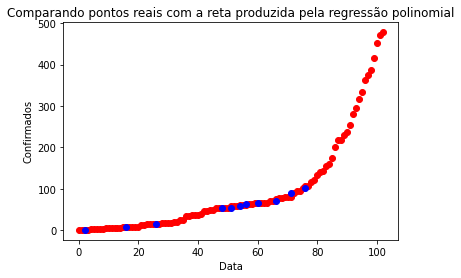

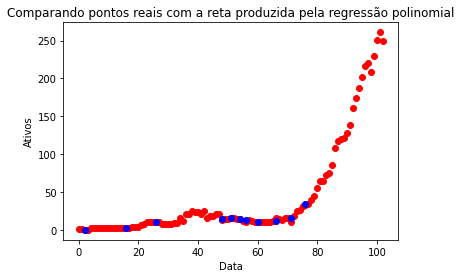

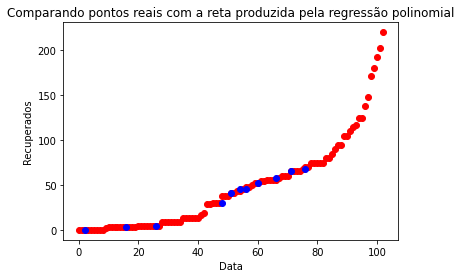

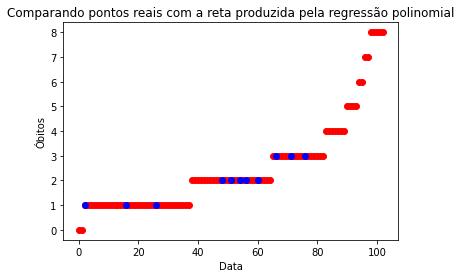

In [5]:
%matplotlib inline
#-*- coding: utf-8 -*-

import json
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree.export import export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import PoissonRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree

def evaluate(pr,x,y1):
    y2 = pr.predict(x)
    nota = sqrt(mean_squared_error(y1, y2))
    return nota,y2

def convertedatas(data):
    data.reverse()
    data = np.asarray(data)
    for i in range(0,data.size,1):
      data[i] = i
    data2 = data.reshape(-1,1)
    data2 = data2.astype(np.int)
    return data2

def preprocessing(valor):
    valor.reverse()
    valor = np.asarray(valor)
    valor = valor.astype(np.int)
    valor = valor.reshape(-1,1)
    return valor

def transform(x,a):
    polynomialFeatures = PolynomialFeatures(degree = a)
    XPolynomial = polynomialFeatures.fit_transform(x)
    return XPolynomial

def polynomial_regression(x,y):
    polyLinearRegression =  tree.DecisionTreeRegressor(criterion="friedman_mse",splitter = "random")
    polyLinearRegression.fit(x,y)
    return polyLinearRegression

def showPlot(xreal, yreal, xpred , ypred,text):
    plt.scatter(xreal,yreal, color = 'red') #Mostra os pontos reais dos dados
    plt.scatter(xpred,ypred,color = 'blue') #Mostra os pontos preditos pelo modelo
    plt.title("Comparando pontos reais com a reta produzida pela regressão polinomial")
    plt.xlabel("Data")
    plt.ylabel(text)
    plt.show()

if __name__ == "__main__":
    arq = """ [
        {
            "data": "18/07/2020",
            "confirmados": "478",
            "ativos": "250",
            "recuperados": "220",
            "óbitos": "8"
        },
        {
            "data": "17/07/2020",
            "confirmados": "471",
            "ativos": "261",
            "recuperados": "202",
            "óbitos": "8"
        },
        {
            "data": "16/07/2020",
            "confirmados": "451",
            "ativos": "251",
            "recuperados": "192",
            "óbitos": "8"
        },
        {
            "data": "15/07/2020",
            "confirmados": "417",
            "ativos": "229",
            "recuperados": "180",
            "óbitos": "8"
        },
        {
            "data": "14/07/2020",
            "confirmados": "387",
            "ativos": "208",
            "recuperados": "171",
            "óbitos": "8"
        },
        {
            "data": "13/07/2020",
            "confirmados": "375",
            "ativos": "220",
            "recuperados": "148",
            "óbitos": "7"
        },
        {
            "data": "12/07/2020",
            "confirmados": "362",
            "ativos": "217",
            "recuperados": "138",
            "óbitos": "7"
        },
        {
            "data": "11/07/2020",
            "confirmados": "334",
            "ativos": "202",
            "recuperados": "125",
            "óbitos": "6"
        },
        {
            "data": "10/07/2020",
            "confirmados": "318",
            "ativos": "187",
            "recuperados": "125",
            "óbitos": "6"
        },
        {
            "data": "09/07/2020",
            "confirmados": "296",
            "ativos": "174",
            "recuperados": "117",
            "óbitos": "5"
        },
        {
            "data": "08/07/2020",
            "confirmados": "281",
            "ativos": "161",
            "recuperados": "115",
            "óbitos": "5"
        },
        {
            "data": "07/07/2020",
            "confirmados": "254",
            "ativos": "139",
            "recuperados": "110",
            "óbitos": "5"
        },
        {
            "data": "06/07/2020",
            "confirmados": "238",
            "ativos": "128",
            "recuperados": "105",
            "óbitos": "5"
        },
        {
            "data": "05/07/2020",
            "confirmados": "230",
            "ativos": "121",
            "recuperados": "105",
            "óbitos": "4"
        },
        {
            "data": "04/07/2020",
            "confirmados": "219",
            "ativos": "120",
            "recuperados": "95",
            "óbitos": "4"
        },
        {
            "data": "03/07/2020",
            "confirmados": "217",
            "ativos": "118",
            "recuperados": "95",
            "óbitos": "4"
        },
        {
            "data": "02/07/2020",
            "confirmados": "202",
            "ativos": "108",
            "recuperados": "90",
            "óbitos": "4"
        },
        {
            "data": "01/07/2020",
            "confirmados": "175",
            "ativos": "86",
            "recuperados": "85",
            "óbitos": "4"
        },
        {
            "data": "30/06/2020",
            "confirmados": "159",
            "ativos": "75",
            "recuperados": "80",
            "óbitos": "4"
        },
        {
            "data": "29/06/2020",
            "confirmados": "156",
            "ativos": "72",
            "recuperados": "80",
            "óbitos": "4"
        },
        {
            "data": "28/06/2020",
            "confirmados": "143",
            "ativos": "65",
            "recuperados": "75",
            "óbitos": "3"
        },
        {
            "data": "27/06/2020",
            "confirmados": "141",
            "ativos": "64",
            "recuperados": "74",
            "óbitos": "3"
        },
        {
            "data": "26/06/2020",
            "confirmados": "133",
            "ativos": "56",
            "recuperados": "74",
            "óbitos": "3"
        },
        {
            "data": "25/06/2020",
            "confirmados": "122",
            "ativos": "45",
            "recuperados": "74",
            "óbitos": "3"
        },
        {
            "data": "24/06/2020",
            "confirmados": "116",
            "ativos": "39",
            "recuperados": "74",
            "óbitos": "3"
        },
        {
            "data": "23/06/2020",
            "confirmados": "107",
            "ativos": "34",
            "recuperados": "70",
            "óbitos": "3"
        },
        {
            "data": "22/06/2020",
            "confirmados": "106",
            "ativos": "33",
            "recuperados": "70",
            "óbitos": "3"
        },
        {
            "data": "21/06/2020",
            "confirmados": "103",
            "ativos": "31",
            "recuperados": "68",
            "óbitos": "3"
        },
        {
            "data": "20/06/2020",
            "confirmados": "96",
            "ativos": "26",
            "recuperados": "66",
            "óbitos": "3"
        },
        {
            "data": "19/06/2020",
            "confirmados": "95",
            "ativos": "25",
            "recuperados": "66",
            "óbitos": "3"
        },
        {
            "data": "18/06/2020",
            "confirmados": "89",
            "ativos": "19",
            "recuperados": "66",
            "óbitos": "3"
        },
        {
            "data": "17/06/2020",
            "confirmados": "80",
            "ativos": "10",
            "recuperados": "66",
            "óbitos": "3"
        },
        {
            "data": "16/06/2020",
            "confirmados": "80",
            "ativos": "16",
            "recuperados": "60",
            "óbitos": "3"
        },
        {
            "data": "15/06/2020",
            "confirmados": "80",
            "ativos": "16",
            "recuperados": "60",
            "óbitos": "3"
        },
        {
            "data": "14/06/2020",
            "confirmados": "77",
            "ativos": "13",
            "recuperados": "60",
            "óbitos": "3"
        },
        {
            "data": "13/06/2020",
            "confirmados": "77",
            "ativos": "15",
            "recuperados": "58",
            "óbitos": "3"
        },
        {
            "data": "12/06/2020",
            "confirmados": "75",
            "ativos": "16",
            "recuperados": "55",
            "óbitos": "3"
        },
        {
            "data": "11/06/2020",
            "confirmados": "71",
            "ativos": "12",
            "recuperados": "55",
            "óbitos": "3"
        },
        {
            "data": "10/06/2020",
            "confirmados": "70",
            "ativos": "11",
            "recuperados": "55",
            "óbitos": "2"
        },
        {
            "data": "09/06/2020",
            "confirmados": "67",
            "ativos": "10",
            "recuperados": "55",
            "óbitos": "2"
        },
        {
            "data": "08/06/2020",
            "confirmados": "67",
            "ativos": "11",
            "recuperados": "54",
            "óbitos": "2"
        },
        {
            "data": "07/06/2020",
            "confirmados": "66",
            "ativos": "10",
            "recuperados": "54",
            "óbitos": "2"
        },
        {
            "data": "06/06/2020",
            "confirmados": "66",
            "ativos": "11",
            "recuperados": "52",
            "óbitos": "2"
        },
        {
            "data": "05/06/2020",
            "confirmados": "65",
            "ativos": "10",
            "recuperados": "52",
            "óbitos": "2"
        },
        {
            "data": "04/06/2020",
            "confirmados": "64",
            "ativos": "12",
            "recuperados": "50",
            "óbitos": "2"
        },
        {
            "data": "03/06/2020",
            "confirmados": "63",
            "ativos": "13",
            "recuperados": "48",
            "óbitos": "2"
        },
        {
            "data": "02/06/2020",
            "confirmados": "60",
            "ativos": "10",
            "recuperados": "48",
            "óbitos": "2"
        },
        {
            "data": "01/06/2020",
            "confirmados": "60",
            "ativos": "12",
            "recuperados": "46",
            "óbitos": "2"
        },
        {
            "data": "31/05/2020",
            "confirmados": "60",
            "ativos": "15",
            "recuperados": "43",
            "óbitos": "2"
        },
        {
            "data": "30/05/2020",
            "confirmados": "59",
            "ativos": "14",
            "recuperados": "43",
            "óbitos": "2"
        },
        {
            "data": "29/05/2020",
            "confirmados": "59",
            "ativos": "16",
            "recuperados": "41",
            "óbitos": "2"
        },
        {
            "data": "28/05/2020",
            "confirmados": "59",
            "ativos": "16",
            "recuperados": "41",
            "óbitos": "2"
        },
        {
            "data": "27/05/2020",
            "confirmados": "55",
            "ativos": "15",
            "recuperados": "38",
            "óbitos": "2"
        },
        {
            "data": "26/05/2020",
            "confirmados": "55",
            "ativos": "15",
            "recuperados": "38",
            "óbitos": "2"
        },
        {
            "data": "25/05/2020",
            "confirmados": "53",
            "ativos": "13",
            "recuperados": "38",
            "óbitos": "2"
        },
        {
            "data": "24/05/2020",
            "confirmados": "53",
            "ativos": "21",
            "recuperados": "30",
            "óbitos": "2"
        },
        {
            "data": "23/05/2020",
            "confirmados": "53",
            "ativos": "21",
            "recuperados": "30",
            "óbitos": "2"
        },
        {
            "data": "22/05/2020",
            "confirmados": "50",
            "ativos": "18",
            "recuperados": "30",
            "óbitos": "2"
        },
        {
            "data": "21/05/2020",
            "confirmados": "49",
            "ativos": "18",
            "recuperados": "29",
            "óbitos": "2"
        },
        {
            "data": "20/05/2020",
            "confirmados": "47",
            "ativos": "16",
            "recuperados": "29",
            "óbitos": "2"
        },
        {
            "data": "19/05/2020",
            "confirmados": "46",
            "ativos": "25",
            "recuperados": "19",
            "óbitos": "2"
        },
        {
            "data": "18/05/2020",
            "confirmados": "40",
            "ativos": "21",
            "recuperados": "17",
            "óbitos": "2"
        },
        {
            "data": "17/05/2020",
            "confirmados": "38",
            "ativos": "23",
            "recuperados": "13",
            "óbitos": "2"
        },
        {
            "data": "16/05/2020",
            "confirmados": "38",
            "ativos": "23",
            "recuperados": "13",
            "óbitos": "2"
        },
        {
            "data": "15/05/2020",
            "confirmados": "38",
            "ativos": "25",
            "recuperados": "13",
            "óbitos": "2"
        },
        {
            "data": "14/05/2020",
            "confirmados": "35",
            "ativos": "21",
            "recuperados": "13",
            "óbitos": "1"
        },
        {
            "data": "13/05/2020",
            "confirmados": "35",
            "ativos": "21",
            "recuperados": "13",
            "óbitos": "1"
        },
        {
            "data": "12/05/2020",
            "confirmados": "26",
            "ativos": "12",
            "recuperados": "13",
            "óbitos": "1"
        },
        {
            "data": "11/05/2020",
            "confirmados": "26",
            "ativos": "16",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "10/05/2020",
            "confirmados": "19",
            "ativos": "9",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "09/05/2020",
            "confirmados": "19",
            "ativos": "9",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "08/05/2020",
            "confirmados": "18",
            "ativos": "8",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "07/05/2020",
            "confirmados": "18",
            "ativos": "8",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "06/05/2020",
            "confirmados": "18",
            "ativos": "8",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "05/05/2020",
            "confirmados": "18",
            "ativos": "8",
            "recuperados": "09",
            "óbitos": "1"
        },
        {
            "data": "04/05/2020",
            "confirmados": "16",
            "ativos": "11",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "03/05/2020",
            "confirmados": "15",
            "ativos": "10",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "02/05/2020",
            "confirmados": "15",
            "ativos": "10",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "01/05/2020",
            "confirmados": "15",
            "ativos": "10",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "30/04/2020",
            "confirmados": "15",
            "ativos": "10",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "29/04/2020",
            "confirmados": "13",
            "ativos": "8",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "28/04/2020",
            "confirmados": "12",
            "ativos": "7",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "27/04/2020",
            "confirmados": "09",
            "ativos": "4",
            "recuperados": "4",
            "óbitos": "1"
        },
        {
            "data": "26/04/2020",
            "confirmados": "08",
            "ativos": "4",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "25/04/2020",
            "confirmados": "08",
            "ativos": "4",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "24/04/2020",
            "confirmados": "07",
            "ativos": "3",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "23/04/2020",
            "confirmados": "07",
            "ativos": "3",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "22/04/2020",
            "confirmados": "07",
            "ativos": "3",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "21/04/2020",
            "confirmados": "06",
            "ativos": "2",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "20/04/2020",
            "confirmados": "06",
            "ativos": "2",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "19/04/2020",
            "confirmados": "06",
            "ativos": "2",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "18/04/2020",
            "confirmados": "6",
            "ativos": "2",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "17/04/2020",
            "confirmados": "6",
            "ativos": "2",
            "recuperados": "3",
            "óbitos": "1"
        },
        {
            "data": "16/04/2020",
            "confirmados": "6",
            "ativos": "3",
            "recuperados": "2",
            "óbitos": "1"
        },
        {
            "data": "15/04/2020",
            "confirmados": "4",
            "ativos": "3",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "14/04/2020",
            "confirmados": "4",
            "ativos": "3",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "13/04/2020",
            "confirmados": "4",
            "ativos": "3",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "12/04/2020",
            "confirmados": "4",
            "ativos": "3",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "11/04/2020",
            "confirmados": "4",
            "ativos": "3",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "10/04/2020",
            "confirmados": "1",
            "ativos": "0",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "09/04/2020",
            "confirmados": "1",
            "ativos": "0",
            "recuperados": "0",
            "óbitos": "1"
        },
        {
            "data": "08/04/2020",
            "confirmados": "1",
            "ativos": "1",
            "recuperados": "0",
            "óbitos": "0"
        },
        {
            "data": "07/04/2020",
            "confirmados": "1",
            "ativos": "1",
            "recuperados": "0",
            "óbitos": "0"
        }
    ]
    """
    data = []
    confirmados = []
    ativos = []
    recuperados = []
    mortes = []
    lista = json.loads(arq)
    for i,nome in enumerate(lista):
      dicionario = lista[i]
      data.append(dicionario["data"])
      confirmados.append(dicionario["confirmados"])
      ativos.append(dicionario["ativos"])
      recuperados.append(dicionario["recuperados"])
      mortes.append(dicionario["óbitos"])
    confirmados = preprocessing(confirmados)
    ativos = preprocessing(ativos)
    recuperados = preprocessing(recuperados)
    mortes = preprocessing(mortes)
    datas = convertedatas(data)
    xtreinodata, xtestedata, ytreinoconf, ytesteconf = train_test_split(datas, confirmados, test_size = 0.1, random_state = 0)
    xtreinodata, xtestedata, ytreinomoni, ytestemoni = train_test_split(datas, ativos, test_size = 0.1,random_state = 0 )
    xtreinodata, xtestedata, ytreinocura, ytestecura = train_test_split(datas, recuperados, test_size = 0.1, random_state = 0)
    xtreinodata, xtestedata, ytreinomortes, ytestemortes= train_test_split(datas, mortes, test_size = 0.1, random_state = 0)
    #xtreinoaux = transform(xtreinodata,4)
    #xtesteaux =  transform(xtestedata,4)
    pr1 = polynomial_regression(xtreinodata,ytreinoconf)
    pr2 = polynomial_regression(xtreinodata,ytreinomoni)
    pr3 = polynomial_regression(xtreinodata,ytreinocura)
    pr4 = polynomial_regression(xtreinodata,ytreinomortes)
    xaux = [103,104]
    xaux = np.asarray(xaux)
    xaux = xaux.astype(np.int)
    xaux = xaux.reshape(-1,1)
    #xaux = transform(xaux,4)
    yaux = pr1.predict(xaux)
    tree_rules = export_text(pr1)
    print(tree_rules)
    nt1,y1 = evaluate(pr1,xtestedata,ytesteconf)
    nt2,y2 = evaluate(pr2,xtestedata,ytestemoni)
    nt3,y3 = evaluate(pr3,xtestedata,ytestecura)
    nt4,y4= evaluate(pr4,xtestedata,ytestemortes)
    print(nt1," ",nt2," ",nt3," ",nt4)
    showPlot(datas,confirmados,xtestedata,y1,"Confirmados")
    showPlot(datas,ativos,xtestedata,y2,"Ativos")
    showPlot(datas,recuperados,xtestedata,y3,"Recuperados")
    showPlot(datas,mortes,xtestedata,y4,"Óbitos")